In [1]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
halving_01  = pd.read_csv('./data/clean/halving_01_v4.csv')
halving_02_to_04 = pd.read_csv('./data/clean/halving_02_to_04.csv')

In [3]:
halving_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                529 non-null    object 
 1   symbol              529 non-null    object 
 2   date                529 non-null    object 
 3   rank                529 non-null    float64
 4   market_cap          529 non-null    float64
 5   price               529 non-null    float64
 6   circulating_supply  529 non-null    float64
 7   %1h                 529 non-null    float64
 8   %7h                 529 non-null    float64
 9   %24h                529 non-null    float64
 10  class               529 non-null    float64
 11  ismultiplatform     529 non-null    float64
dtypes: float64(9), object(3)
memory usage: 49.7+ KB


In [4]:
halving_02_to_04['rank']=halving_02_to_04['rank'].astype(int)
halving_02_to_04['date']=pd.to_datetime(halving_02_to_04['date'])
halving_02_to_04['ismultiplatform']=halving_02_to_04['ismultiplatform'].astype(bool)
halving_02_to_04['class']=halving_02_to_04['class'].astype('object')

In [5]:
halving_02_to_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92282 entries, 0 to 92281
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                92282 non-null  object        
 1   symbol              92282 non-null  object        
 2   date                92282 non-null  datetime64[ns]
 3   rank                92282 non-null  int32         
 4   market_cap          92282 non-null  float64       
 5   price               92282 non-null  float64       
 6   circulating_supply  92282 non-null  float64       
 7   volume_24h          92282 non-null  float64       
 8   %1h                 92282 non-null  float64       
 9   %7h                 92282 non-null  float64       
 10  %24h                92282 non-null  float64       
 11  class               92282 non-null  object        
 12  ismultiplatform     92282 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(7), int

In [6]:
halving_01.columns.to_list()

['name',
 'symbol',
 'date',
 'rank',
 'market_cap',
 'price',
 'circulating_supply',
 '%1h',
 '%7h',
 '%24h',
 'class',
 'ismultiplatform']

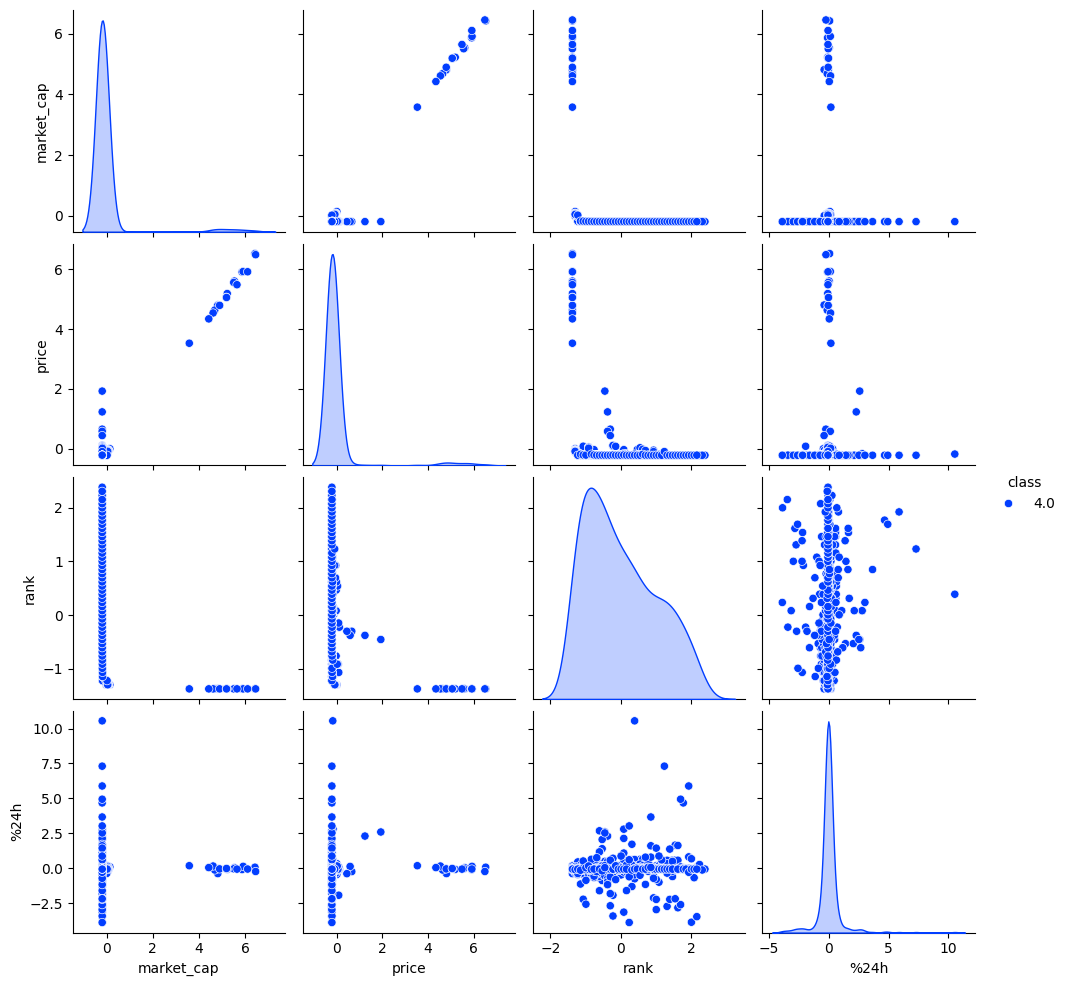

In [7]:
numeric_columns = ['market_cap', 'price','rank','%24h']
df_numeric = halving_01[numeric_columns + ['class']]

sns.pairplot(df_numeric, hue='class', palette='bright')
plt.show()

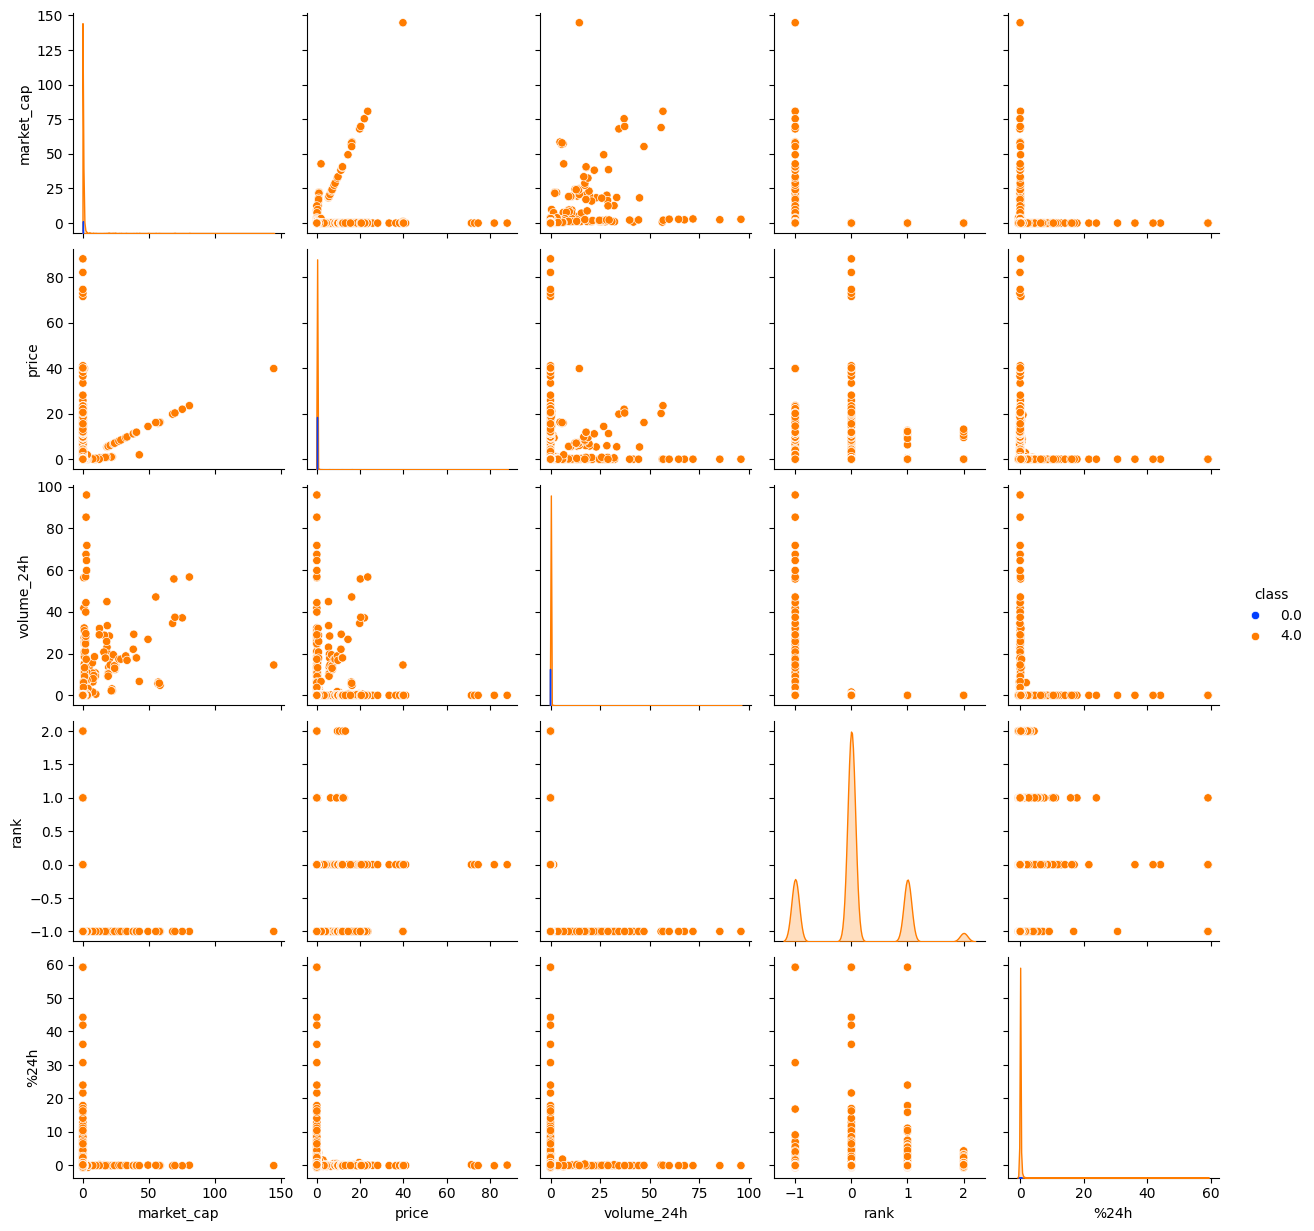

In [8]:
numeric_columns = ['market_cap', 'price', 'volume_24h','rank','%24h']
df_numeric = halving_02_to_04[numeric_columns + ['class']]

sns.pairplot(df_numeric, hue='class', palette='bright')
plt.show()

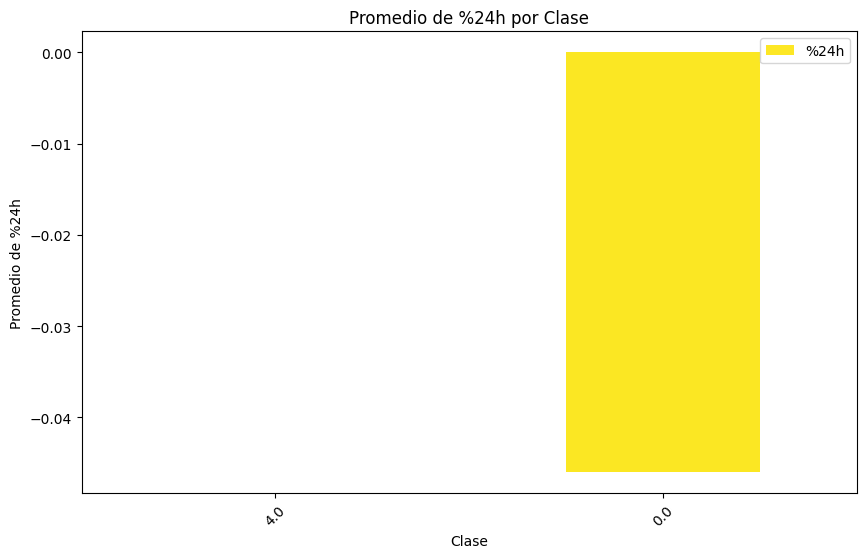

In [9]:
class_grouped = halving_02_to_04.groupby('class')['%24h'].mean().sort_values(ascending=False)

colors = plt.cm.viridis_r(range(len(class_grouped)))

plt.figure(figsize=(10, 6))
class_grouped.plot(kind='bar', color=colors)
plt.title('Promedio de %24h por Clase')
plt.xlabel('Clase')
plt.ylabel('Promedio de %24h')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_31236\4113914426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['date'].dt.year


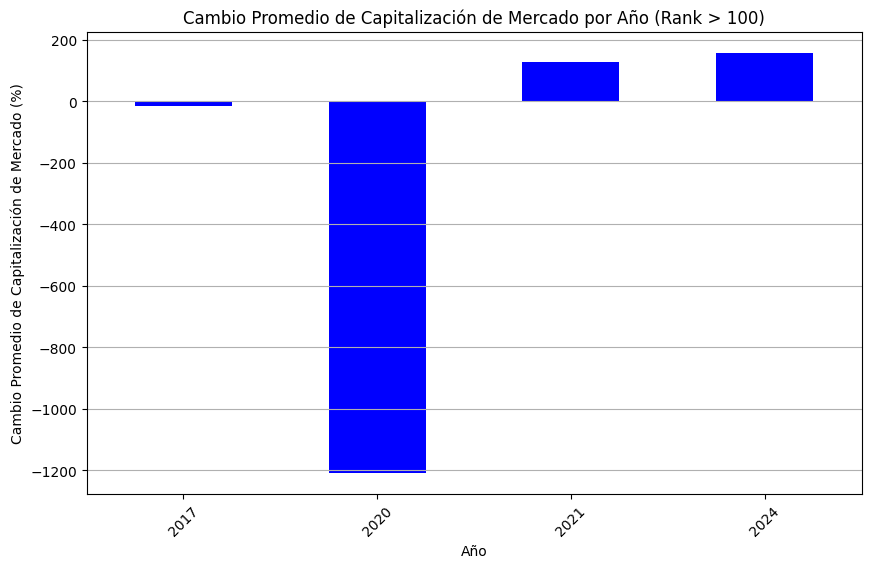

In [10]:
df_filtered = halving_02_to_04[halving_02_to_04['rank'] < -0.5]

if not df_filtered.empty:
    df_filtered['year'] = df_filtered['date'].dt.year

    yearly_market_cap_change = df_filtered.groupby('year')['market_cap'].mean().pct_change().dropna() * 100

    plt.figure(figsize=(10, 6))
    yearly_market_cap_change.plot(kind='bar', color='b')
    plt.title('Cambio Promedio de Capitalización de Mercado por Año (Rank > 100)')
    plt.xlabel('Año')
    plt.ylabel('Cambio Promedio de Capitalización de Mercado (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No hay suficientes datos disponibles para calcular el cambio promedio de capitalización de mercado.")

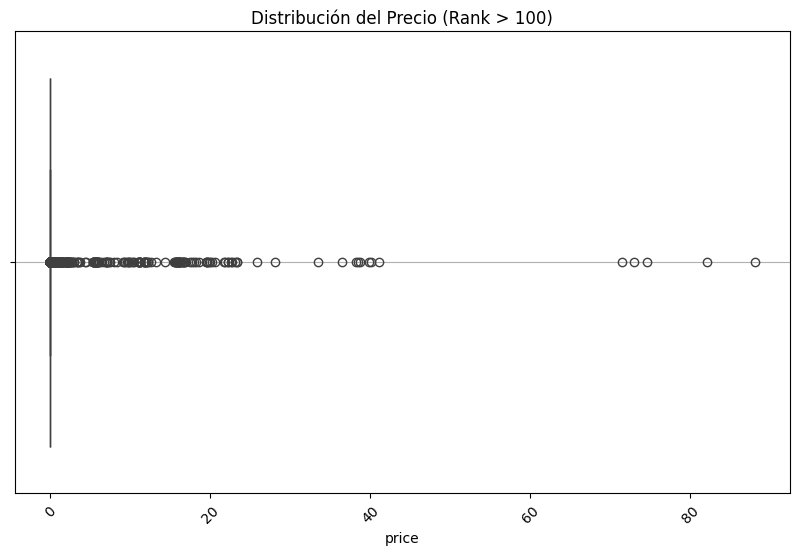

In [11]:
df_filtered = halving_02_to_04[halving_02_to_04['rank'] > -0.8]

plt.figure(figsize=(10, 6))
sns.boxplot( x='price', data=df_filtered)
plt.title('Distribución del Precio (Rank > 100)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_31236\1294399481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop('rank', axis=1, inplace=True)


<Axes: >

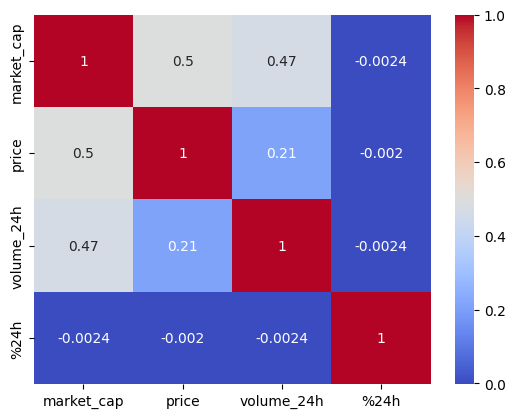

In [17]:
df_filtered = halving_02_to_04[halving_02_to_04['rank'] ==-1]
df_numeric = df_filtered[numeric_columns]
df_numeric.drop('rank', axis=1, inplace=True)
corr= df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')